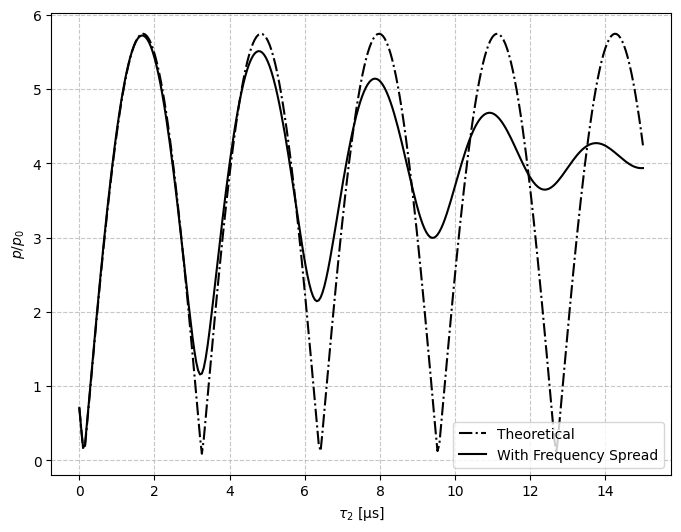

In [18]:
# Rayan Trabelsi

import numpy as np
import matplotlib.pyplot as plt

tau1 = 8  # tau1 value from the article in microseconds

tau2_vals = np.linspace(0, 15, 300)  # tau2 values in microseconds

omega_osc_center = 1.0  # normalized central frequency
frequency_spread = 0.1  # 10% spread

def momentum_spread_ratio(tau1, tau2, omega):
    phi = np.arctan2(2, omega*tau1)
    return np.sqrt(0.5 * (1 + (omega*tau1)**2/2 - omega*tau1*np.sqrt(1 + (omega*tau1)**2/4) *
                         np.cos(2*omega*tau2 - phi)))

# theoretical without damping
ratio_no_damping = momentum_spread_ratio(tau1, tau2_vals, omega_osc_center)

# averaged over frequency spread
omega_osc_vals = np.linspace(omega_osc_center * (1 - frequency_spread),
                            omega_osc_center * (1 + frequency_spread), 20)

variances = [momentum_spread_ratio(tau1, tau2_vals, omega)**2 for omega in omega_osc_vals]
ratio_damped = np.sqrt(np.mean(variances, axis=0))


plt.figure(figsize=(8, 6))
plt.plot(tau2_vals, ratio_no_damping, '-.', label="Theoretical", color='black')
plt.plot(tau2_vals, ratio_damped, '-', label="With Frequency Spread", color='black')
plt.xlabel(r"$\tau_2$ [μs]")
plt.ylabel(r"$p/p_0$")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.show()